In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [2]:
import os
os.getcwd()

'c:\\Users\\nagar\\HelloPython\\AnalyticalProjects\\Global Economic Growth and Risk Forecasting\\notebooks'

In [3]:
df = pd.read_csv("../data/processed/wbdata_processed.csv")
df.head()

,country,date,gdp_growth,inflation,unemployment,school_enrollment,population,gdp_percapita
0,Afghanistan,1970-01-01 00:00:00.000002005,11.229715,12.686269,7.885,100.229691,24404567.0,363.640141
1,Afghanistan,1970-01-01 00:00:00.000002006,5.357403,6.784597,7.914,103.932243,25424094.0,367.758312
2,Afghanistan,1970-01-01 00:00:00.000002007,13.826320,8.680571,7.817,101.086456,25909852.0,410.757729
3,Afghanistan,1970-01-01 00:00:00.000002008,3.924984,26.418664,7.878,103.413963,26482622.0,417.647283
4,Afghanistan,1970-01-01 00:00:00.000002009,21.390528,-6.811161,7.754,99.369720,27466101.0,488.830652


In [4]:
df.shape

(4578, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4578 entries, 0 to 4577
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            4578 non-null   object 
 1   date               4578 non-null   object 
 2   gdp_growth         4578 non-null   float64
 3   inflation          4578 non-null   float64
 4   unemployment       4578 non-null   float64
 5   school_enrollment  4578 non-null   float64
 6   population         4578 non-null   float64
 7   gdp_percapita      4578 non-null   float64
dtypes: float64(6), object(2)
memory usage: 286.3+ KB


In [6]:
df.isnull().mean().sort_values(ascending=False) * 100

country              0.0
date                 0.0
gdp_growth           0.0
inflation            0.0
unemployment         0.0
school_enrollment    0.0
population           0.0
gdp_percapita        0.0
dtype: float64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.describe()

,gdp_growth,inflation,unemployment,school_enrollment,population,gdp_percapita
count,4578.000000,4578.000000,4578.00000,4578.000000,4.578000e+03,4578.000000
mean,3.798185,5.463484,7.43276,101.538031,3.899787e+08,12439.633099
std,4.694373,11.872270,5.14300,12.323495,1.035927e+09,17612.831963
min,-54.336106,-16.859691,0.10000,31.846920,1.013230e+05,252.806675
25%,1.928907,1.963568,4.12000,97.458643,4.201230e+06,1676.354098
50%,3.936079,3.698952,6.12650,101.428520,1.605762e+07,4778.720338
75%,5.925307,6.500997,9.20000,106.367529,1.689534e+08,13609.802536
max,75.061857,557.201817,37.32000,214.671173,8.064977e+09,112417.876989


In [9]:
fig = px.histogram(df, x='gdp_growth', nbins=50, marginal='box',
                    title='Distribution of GDP Growth (%)')
fig.show()

In [10]:
fig = px.histogram(df, x='inflation', nbins=50,marginal="box" ,title='Distribution of Inflation (%)')
fig.show()

In [11]:
fig = px.histogram(df, x='unemployment', nbins=50,marginal="box" ,title='Distribution of Unemployment Rate (%)')
fig.show()

In [12]:
fig = px.histogram(df, x='gdp_percapita', nbins=50, marginal="box" ,title='Distribution of GDP per capita')
fig.show()

In [13]:
corr = df[['gdp_growth', 'inflation', 'unemployment', 'school_enrollment', 'population', 'gdp_percapita']].corr()
fig = px.imshow(corr, text_auto=True, title='Correlation Matrix', color_continuous_scale='Viridis')
fig.show()

In [14]:

fig = px.scatter(df,
                 x='inflation',
                 y='gdp_growth',
                 color='country',
                 hover_name='country',
                 title='GDP Growth vs Inflation Rate')

fig.show()


The plot looks like this is because of the reason there are extreme outliers in the data. This compressed rest of the relevant data points into tiny area and make them appear collinear. The data is also extremely clustered around average values.

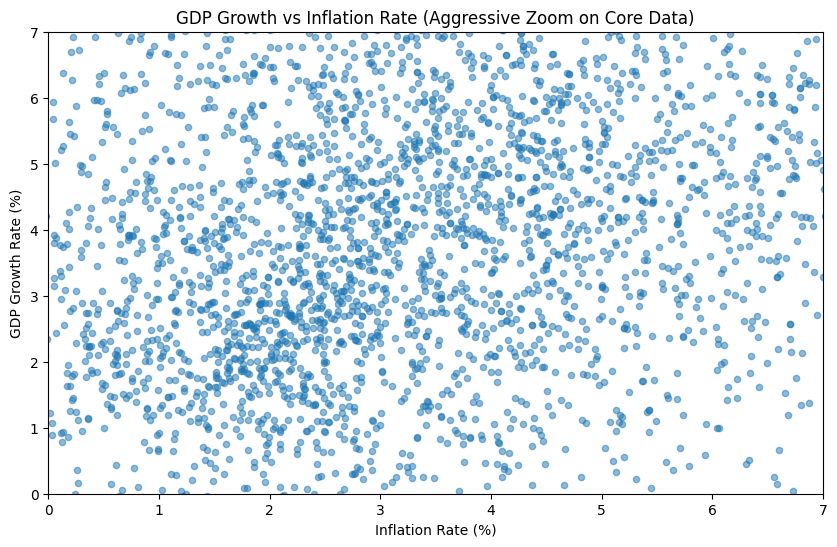

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['inflation'], df['gdp_growth'], s=20, alpha=0.5)

plt.xlim(0, 7)
plt.ylim(0, 7)

plt.title('GDP Growth vs Inflation Rate (Aggressive Zoom on Core Data)')
plt.xlabel('Inflation Rate (%)')
plt.ylabel('GDP Growth Rate (%)')
plt.show()


The above plot zooms on the main cluster. 
Here I manually restricted the axis ranges to focus on dense cluster. This reveals distinct plot

NameError: name 'x_min' is not defined

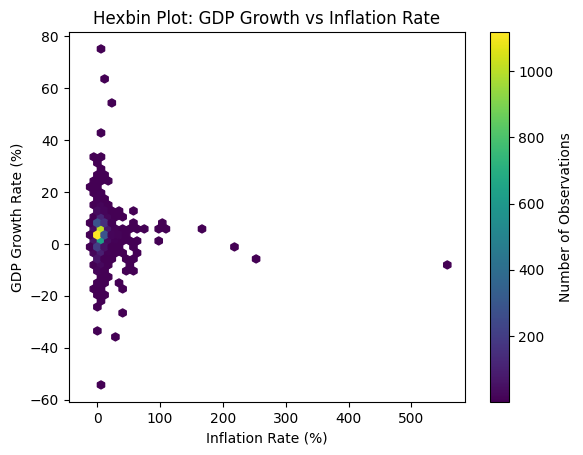

In [16]:
hb = plt.hexbin(df['inflation'], df['gdp_growth'], gridsize=50, cmap='viridis', mincnt=1)
plt.colorbar(hb, label='Number of Observations')
plt.title('Hexbin Plot: GDP Growth vs Inflation Rate')
plt.xlabel('Inflation Rate (%)')
plt.ylabel('GDP Growth Rate (%)')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

In [ ]:
df.dtypes

country               object
date                  object
gdp_growth           float64
inflation            float64
unemployment         float64
school_enrollment    float64
population           float64
gdp_percapita        float64
dtype: object

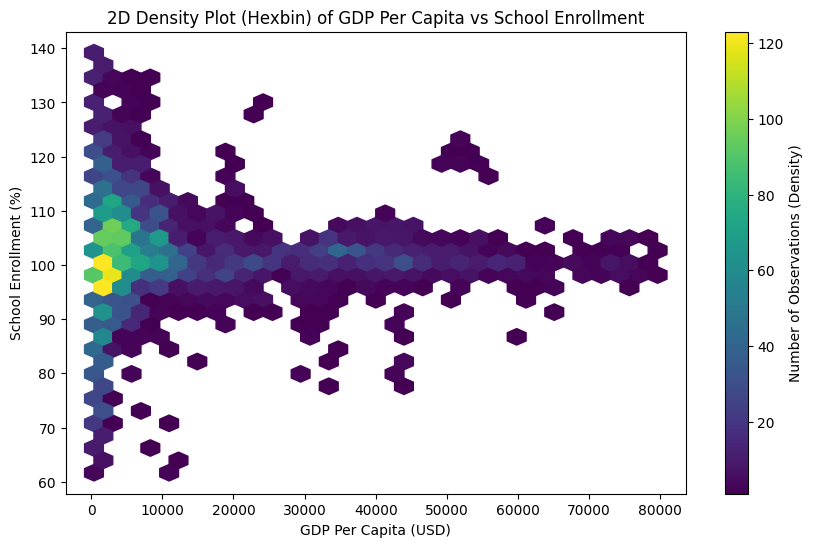

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

x_min = df['gdp_percapita'].quantile(0.01)
x_max = df['gdp_percapita'].quantile(0.99)
y_min = df['school_enrollment'].quantile(0.01)
y_max = df['school_enrollment'].quantile(0.99)

df_filtered = df[
    (df['gdp_percapita'] >= x_min) & (df['gdp_percapita'] <= x_max) &
    (df['school_enrollment'] >= y_min) & (df['school_enrollment'] <= y_max)
].copy()

plt.figure(figsize=(10, 6))
hb = plt.hexbin(df_filtered['gdp_percapita'], df_filtered['school_enrollment'],
                gridsize=30,
                cmap='viridis',
                mincnt=1)

plt.colorbar(hb, label='Number of Observations (Density)')
plt.title('2D Density Plot (Hexbin) of GDP Per Capita vs School Enrollment')
plt.xlabel('GDP Per Capita (USD)')
plt.ylabel('School Enrollment (%)')
plt.show()

In [ ]:
gdp_trend = df.groupby('year')['gdp_growth'].mean().reset_index()
fig = px.line(gdp_trend, x='year', y='gdp_growth', title='Average Global GDP Growth Over Years')
fig.show()

In [ ]:
top_countries = df.groupby('country')['gdp_growth'].mean().nlargest(10).index.to_list()
fig = px.line(df[df['country'].isin(top_countries)],
              x='year', y='gdp_growth', color='country',
              title='GDP Growth Over Years for Top 10 Countries')
fig.show()

In [28]:
df['year'] = df['date'].astype(int)  
df['date'] = pd.to_datetime(df['year'], format='%Y')


df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['year'] = df['date'].dt.year
latest_year = df['year'].max()
df_latest = df[df['year'] == latest_year]


In [29]:
fig  = px.choropleth(df_latest, locations='country', locationmode='country names',
                     color='gdp_growth', hover_name='country',
                     color_continuous_scale=px.colors.sequential.Plasma,
                     title=f'Global GDP Growth in {latest_year}')
fig.show()

C:\Users\nagar\AppData\Local\Temp\ipykernel_13256\2133555586.py:1: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



In [30]:
print("Latest year in the dataset:", latest_year)


Latest year in the dataset: 2023


In [31]:
print(df['date'].head())
print(df['date'].dtype)


0   2005-01-01
1   2006-01-01
2   2007-01-01
3   2008-01-01
4   2009-01-01
Name: date, dtype: datetime64[ns]
datetime64[ns]


In [35]:
fig = px.scatter_geo(df_latest, locations='country', 
                     locationmode='country names', size="population",
                     color='gdp_percapita', color_continuous_scale="Viridis",
                     hover_name="country", projection="natural earth",
                     title=f"Population and GDP per Capita ({latest_year})")
fig.show()

C:\Users\nagar\AppData\Local\Temp\ipykernel_13256\723237300.py:1: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



In [37]:
fig = px.scatter_3d(df_latest, x="gdp_percapita", y="gdp_growth",
                    z="school_enrollment", color="unemployment", 
                    hover_name="country",
                    title="GDP per Capita vs GDP Growth vs School Enrollment")
fig.show()